In [1384]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import scipy.stats as stats

import utils

import importlib
importlib.reload(utils)

<module 'utils' from '/home/appreciate/Dropbox (MIT)/rumor-spreading-modeling/experiments/dallinger/spaceship-v2/utils.py'>

# Read Data

In [1385]:
raw_data

id               creation_time  property1  property2  property3  \
0      1  2018-01-26 12:14:07.732528        NaN        NaN        NaN   
1      2   2018-01-26 12:14:07.81586        NaN        NaN        NaN   
2      3  2018-01-26 12:14:36.181048        NaN        NaN        NaN   
3      4  2018-01-26 12:14:37.056106        NaN        NaN        NaN   
4      5   2018-01-26 12:14:37.10479        NaN        NaN        NaN   
5      6   2018-01-26 12:14:54.46136        NaN        NaN        NaN   
6      7  2018-01-26 12:14:56.324569        NaN        NaN        NaN   
7      8   2018-01-26 12:14:56.45001        NaN        NaN        NaN   
8      9  2018-01-26 12:15:10.404306        NaN        NaN        NaN   
9     10  2018-01-26 12:15:11.269008        NaN        NaN        NaN   
10    11  2018-01-26 12:15:11.327962        NaN        NaN        NaN   
11    12  2018-01-26 12:15:21.866927        NaN        NaN        NaN   
12    13  2018-01-26 12:15:22.041871        NaN        NaN        NaN   
13    14  2018-01-26 12:15:22.063069        NaN        NaN        NaN   
14    15  2018-01-26 12:15:38.361908        NaN        NaN        NaN   
15    16  2018-01-26 12:15:38.566823        NaN        NaN        NaN   
16    17  2018-01-26 12:15:38.585221        NaN        NaN        NaN   
17    18  2018-01-26 12:15:50.587607        NaN        NaN        NaN   
18    19  2018-01-26 12:15:50.721071        NaN        NaN        NaN   
19    20  2018-01-26 12:15:50.737168        NaN        NaN        NaN   
20    33  2018-01-26 13:27:32.867132        NaN        NaN        NaN   
21    21   2018-01-26 12:16:02.09954        NaN        NaN        NaN   
22    22  2018-01-26 12:16:02.250751        NaN        NaN        NaN   
23    23  2018-01-26 12:16:02.268711        NaN        NaN        NaN   
24    28  2018-01-26 13:25:22.019757        NaN        NaN        NaN   
25    29  2018-01-26 13:25:22.035246        NaN        NaN        NaN   
26    52  2018-01-26 14:42:56.304145        NaN        NaN        NaN   
27    53  2018-01-26 14:42:56.335142        NaN        NaN        NaN   
28    24  2018-01-26 12:16:12.844398        NaN        NaN        NaN   
29    36  2018-01-26 13:28:45.137318        NaN        NaN        NaN   
..   ...                         ...        ...        ...        ...   
455  473  2018-01-28 01:30:29.114583        NaN        NaN        NaN   
456  484  2018-01-28 03:16:13.534111        NaN        NaN        NaN   
457  446  2018-01-28 00:12:50.337874        NaN        NaN        NaN   
458  466   2018-01-28 01:10:07.40856        NaN        NaN        NaN   
459  448  2018-01-28 00:13:42.663011        NaN        NaN        NaN   
460  454  2018-01-28 00:37:35.223058        NaN        NaN        NaN   
461  461  2018-01-28 01:05:29.693371        NaN        NaN        NaN   
462  467  2018-01-28 01:11:09.573015        NaN        NaN        NaN   
463  469  2018-01-28 01:24:51.264075        NaN        NaN        NaN   
464  472  2018-01-28 01:29:25.595339        NaN        NaN        NaN   
465  483  2018-01-28 03:15:31.959687        NaN        NaN        NaN   
466  449  2018-01-28 00:14:26.799059        NaN        NaN        NaN   
467  470   2018-01-28 01:26:50.18662        NaN        NaN        NaN   
468  474  2018-01-28 01:31:19.138313        NaN        NaN        NaN   
469  480  2018-01-28 03:13:04.960942        NaN        NaN        NaN   
470  450  2018-01-28 00:14:54.553132        NaN        NaN        NaN   
471  452  2018-01-28 00:36:07.854374        NaN        NaN        NaN   
472  464  2018-01-28 01:09:02.910729        NaN        NaN        NaN   
473  468  2018-01-28 01:12:14.025957        NaN        NaN        NaN   
474  453  2018-01-28 00:37:07.568186        NaN        NaN        NaN   
475  456  2018-01-28 00:38:51.926595        NaN        NaN        NaN   
476  475  2018-01-28 01:31:49.983615        NaN        NaN        NaN   
477  477   2018-01-28 03:07:01.75889        NaN        NaN      

In [1386]:
in_dir = '70f80fdf-rounds-10-evidence-1-population-5'
#in_dir = 'abf00068-rounds-10-evidence-4-population-5'
#in_dir = 'd75786f7-data-2018-01-25-big-experiment'

n_evidence = 1

raw_data = pd.read_csv('./data/' + in_dir + '/info.csv')

data,fails,parts = utils.parse_data(raw_data)

In [1387]:
#data = data[data['turn'] <= 3]

In [1388]:
fails = utils.get_evidence_subset(fails, n_evidence)

In [1389]:
data = data[data['net'] > 3]

In [1390]:
for i in range(1,11):
    print('Participants on turn ' + str(i) + ':', sum(data['turn'] == i)/4)

Participants on turn 1: 5.0
Participants on turn 2: 5.0
Participants on turn 3: 5.0
Participants on turn 4: 5.0
Participants on turn 5: 5.0
Participants on turn 6: 5.0
Participants on turn 7: 5.0
Participants on turn 8: 5.0
Participants on turn 9: 5.0
Participants on turn 10: 5.0


# Analyze Evidence

In [1391]:
last_perfs = []
last_pops = []
pops = []
evidences = []
net_evidences = []
final_pops = []
nets = []
probs = []

num_turns = max(data['turn'])

for net in sorted(set(data['net'])):
    
    net_evidence = utils.get_evidence(fails[net])
    
    print('Net', net)
    print(net_evidence[1][:(num_turns-1)])
    print(np.array(net_evidence[num_turns][:(num_turns-1)] * 100,dtype=int)/100.0)
    
    for t in range(num_turns+1):

        if t > 1:
            last_perfs += list(net_evidence[num_turns][t-2])
            last_pops += list(mean_pop)
        
        if t > 0:    
            mean_pop = utils.get_pop(data,net,t)
            print(mean_pop)
            
        if t > 1:
            pops += list(mean_pop)

    for window in range(1,num_turns):
        print('Final correlation with last',window,'evidence', np.corrcoef(net_evidence[window][t-2],mean_pop)[0,1])

    evidences += list(net_evidence[1][t-2])
    net_evidences += list(net_evidence[num_turns][t-2])
    final_pops += list(mean_pop)
    nets += [net] * len(list(mean_pop))
    probs += list(parts[net])

Net 4
[[ 0.  1.  0.  1.  1.  0.  0.  1.]
 [ 0.  1.  1.  0.  0.  1.  1.  0.]
 [ 1.  1.  0.  0.  0.  0.  1.  1.]
 [ 1.  1.  1.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  1.  1.  1.  1.  0.  1.]
 [ 0.  1.  1.  0.  1.  1.  1.  1.]
 [ 1.  0.  0.  1.  1.  0.  0.  0.]
 [ 1.  1.  0.  1.  0.  1.  1.  1.]]
[[ 0.    1.    0.    1.    1.    0.    0.    1.  ]
 [ 0.    1.    0.5   0.5   0.5   0.5   0.5   0.5 ]
 [ 0.33  1.    0.33  0.33  0.33  0.33  0.66  0.66]
 [ 0.5   1.    0.5   0.5   0.25  0.25  0.5   0.5 ]
 [ 0.6   0.8   0.4   0.6   0.2   0.2   0.4   0.4 ]
 [ 0.5   0.83  0.5   0.66  0.33  0.33  0.33  0.5 ]
 [ 0.42  0.85  0.57  0.57  0.42  0.42  0.42  0.57]
 [ 0.5   0.75  0.5   0.62  0.5   0.37  0.37  0.5 ]
 [ 0.55  0.77  0.44  0.66  0.44  0.44  0.44  0.55]]
[ 0.6  0.6  0.6  0.8  0.4  0.6  0.8  0.8]
[ 0.4  0.4  0.4  0.4  0.2  0.4  0.8  0.6]
[ 0.6  0.   0.4  0.4  0.6  0.2  0.4  0.4]
[ 0.4  0.4  0.4  0.4  0.6  0.4  0.6  0.8]
[ 0.6  0.6  0.8  1.   0.6  0.4  0.2  0.6]
[ 0.6  0

/home/appreciate/Dropbox (MIT)/rumor-spreading-modeling/experiments/dallinger/spaceship-v2/utils.py:92: FutureWarning: pd.rolling_sum is deprecated for ndarrays and will be removed in a future version
  net_evidence[i] = pd.rolling_sum(evidence, i, 1)


In [1392]:
colors = np.array(['']*len(probs))
colors[np.array(probs) > 0.5] = 'blue'
colors[np.array(probs) <= 0.5] = 'red'

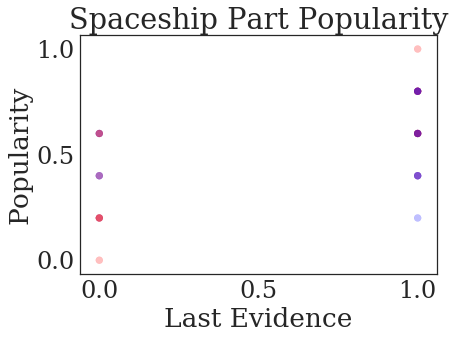

In [1393]:
sns.set(context = 'paper', font_scale = 3, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
plt.scatter(evidences,final_pops,s=50,alpha=0.25,c=colors)
plt.xlabel('Last Evidence')
plt.ylabel('Popularity')
plt.title('Spaceship Part Popularity')
#plt.savefig('choice-evidence.jpg', bbox_inches = 'tight')

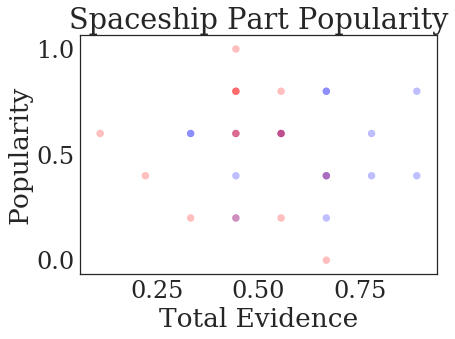

In [1394]:
sns.set(context = 'paper', font_scale = 3, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
plt.scatter(net_evidences,final_pops,s=50,alpha=0.25,c=colors)
plt.xlabel('Total Evidence')
plt.ylabel('Popularity')
plt.title('Spaceship Part Popularity')
#plt.savefig('choice-evidence.jpg', bbox_inches = 'tight')

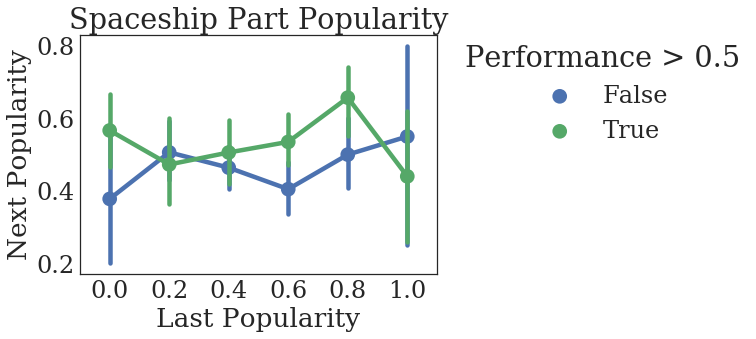

In [1395]:
sns.set(context = 'paper', font_scale = 3, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
sns.pointplot(last_pops,pops,np.array(last_perfs) > 0.5)
plt.xlabel('Last Popularity')
plt.ylabel('Next Popularity')
plt.title('Spaceship Part Popularity')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title = 'Performance > 0.5')
#plt.savefig('choice-evidence.jpg', bbox_inches = 'tight')

In [1396]:
np.array(pops)[np.array(last_pops) == 0]

array([ 0.4,  0.6,  0.4,  0.4,  0.4,  0.6,  0.6,  0.6,  0.8,  0. ,  0.2,
        0. ,  0.6,  0.8,  0.4])

# Analyze Reward

In [1397]:
rewards = []

for net in sorted(set(data['net'])):
    
    rewards += [[]]
    for t in range(num_turns+1):

        if t > 0:
            rewards[-1] += [utils.get_reward(data,parts,net,t)]

rewards = np.transpose(np.array(rewards))

[ 0.6  0.6  0.6  0.8  0.4  0.6  0.8  0.8] [-0.1  0.1  0.1  0.1  0.1 -0.1 -0.1 -0.1]
[ 0.4  0.4  0.4  0.4  0.2  0.4  0.8  0.6] [-0.1  0.1  0.1  0.1  0.1 -0.1 -0.1 -0.1]
[ 0.6  0.   0.4  0.4  0.6  0.2  0.4  0.4] [-0.1  0.1  0.1  0.1  0.1 -0.1 -0.1 -0.1]
[ 0.4  0.4  0.4  0.4  0.6  0.4  0.6  0.8] [-0.1  0.1  0.1  0.1  0.1 -0.1 -0.1 -0.1]
[ 0.6  0.6  0.8  1.   0.6  0.4  0.2  0.6] [-0.1  0.1  0.1  0.1  0.1 -0.1 -0.1 -0.1]
[ 0.6  0.2  0.2  0.8  0.2  0.2  0.8  0.4] [-0.1  0.1  0.1  0.1  0.1 -0.1 -0.1 -0.1]
[ 0.4  0.4  0.4  1.   0.4  0.2  0.2  0.4] [-0.1  0.1  0.1  0.1  0.1 -0.1 -0.1 -0.1]
[ 0.4  0.6  0.6  0.   0.8  0.2  1.   0.4] [-0.1  0.1  0.1  0.1  0.1 -0.1 -0.1 -0.1]
[ 0.6  0.4  0.6  0.6  0.8  0.8  0.2  0.6] [-0.1  0.1  0.1  0.1  0.1 -0.1 -0.1 -0.1]
[ 0.6  0.4  0.6  0.4  0.4  0.6  0.8  0.6] [-0.1  0.1  0.1  0.1  0.1 -0.1 -0.1 -0.1]
[ 0.4  0.6  0.6  0.6  0.6  0.8  0.4  0.4] [-0.1  0.1  0.1 -0.1 -0.1  0.1 -0.1  0.1]
[ 0.   0.6  0.2  0.2  0.6  0.6  1.   0.4] [-0.1  0.1  0.1 -0.1 -0.1  0.1 -0.

In [1398]:
print('Average reward each turn:')
for i,r in enumerate(np.mean(rewards,1)):
    print('Turn ' + str(i+1) + ':', r)

Average reward each turn:
Turn 1: -0.00625
Turn 2: -0.005
Turn 3: -0.000625
Turn 4: -0.009375
Turn 5: 0.001875
Turn 6: -0.00625
Turn 7: -0.000625
Turn 8: -0.01125
Turn 9: -0.006875
Turn 10: -0.004375


In [1399]:
rewards

array([[ -5.00000000e-03,   5.00000000e-03,  -4.25000000e-02,
          1.75000000e-02],
       [ -1.00000000e-02,   0.00000000e+00,  -2.25000000e-02,
          1.25000000e-02],
       [ -2.50000000e-03,  -1.00000000e-02,  -7.50000000e-03,
          1.75000000e-02],
       [ -5.00000000e-03,   2.50000000e-03,  -3.00000000e-02,
         -5.00000000e-03],
       [  1.50000000e-02,   7.50000000e-03,  -2.50000000e-02,
          1.00000000e-02],
       [ -7.50000000e-03,  -2.50000000e-03,  -2.75000000e-02,
          1.25000000e-02],
       [  1.25000000e-02,   2.50000000e-03,  -1.75000000e-02,
          8.67361738e-19],
       [  1.73472348e-18,  -1.75000000e-02,  -3.25000000e-02,
          5.00000000e-03],
       [  2.50000000e-03,   2.50000000e-03,  -3.25000000e-02,
         -1.73472348e-18],
       [ -1.00000000e-02,  -5.00000000e-03,  -2.75000000e-02,
          2.50000000e-02]])

In [1400]:
all_rewards = pd.DataFrame([[i,j,r] for i in range(len(rewards)) for j,r in enumerate(rewards[i])])
all_rewards.columns = ['turn','net','reward']

In [1401]:
[sum(parts[i] == 0.6) for i in parts]

[5, 3, 4, 3, 4, 5, 4, 2]

In [1402]:
-0.1*0.4*6/8 + 0.1*0.6*2/8

-0.015000000000000006

In [1403]:
all_rewards.groupby(['turn','net']).mean()

reward
turn net              
0    0   -5.000000e-03
     1    5.000000e-03
     2   -4.250000e-02
     3    1.750000e-02
1    0   -1.000000e-02
     1    0.000000e+00
     2   -2.250000e-02
     3    1.250000e-02
2    0   -2.500000e-03
     1   -1.000000e-02
     2   -7.500000e-03
     3    1.750000e-02
3    0   -5.000000e-03
     1    2.500000e-03
     2   -3.000000e-02
     3   -5.000000e-03
4    0    1.500000e-02
     1    7.500000e-03
     2   -2.500000e-02
     3    1.000000e-02
5    0   -7.500000e-03
     1   -2.500000e-03
     2   -2.750000e-02
     3    1.250000e-02
6    0    1.250000e-02
     1    2.500000e-03
     2   -1.750000e-02
     3    8.673617e-19
7    0    1.734723e-18
     1   -1.750000e-02
     2   -3.250000e-02
     3    5.000000e-03
8    0    2.500000e-03
     1    2.500000e-03
     2   -3.250000e-02
     3   -1.734723e-18
9    0   -1.000000e-02
     1   -5.000000e-03
     2   -2.750000e-02
     3    2.500000e-02

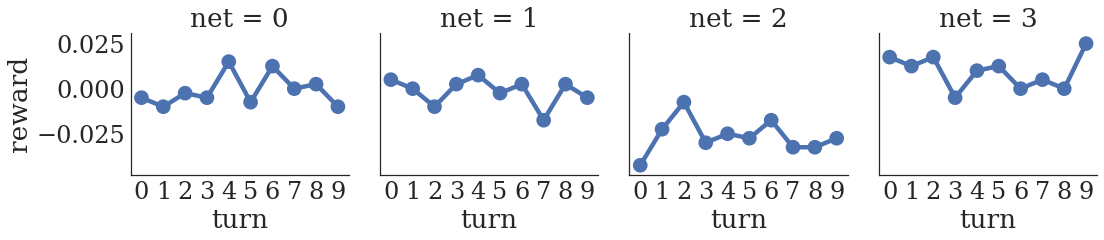

In [1404]:
sns.factorplot('turn','reward',col='net',data=all_rewards)

In [1405]:
print(stats.linregress(all_rewards['turn'], all_rewards['reward']))

LinregressResult(slope=-0.00018939393939393926, intercept=-0.0040227272727272724, rvalue=-0.034733379700481085, pvalue=0.83150524905960876, stderr=0.00088402614395097288)


In [1406]:
all_rewards.to_csv('all_rewards.csv')

In [1407]:

turn = []
seen = []
perf = []
choice = []
net = []
item = []

for i,row in data.iterrows():
    
    if len(row['viewed']) > 0:
        
        print('----')
        print(row['net'],row['turn'])
        print(row['viewed'])
        print(fails[row['net']][row['turn']-2])
        print(row['action'])
        
        for j in range(len(row['action'])):
            
            these_successes = sum(np.array(fails[row['net']][row['turn']-2][j]) == 'success')
            these_fails = sum(np.array(fails[row['net']][row['turn']-2][j]) == 'fail')
            
            turn += [row['turn']]
            seen += [row['viewed'][j][0] != '0']
            perf += [these_successes - these_fails]
            choice += [row['action'][j]]
            net += [row['net']]
            item += [j]
            
indiv_choices = pd.DataFrame({'turn':turn,'seen':seen,'perf':perf,'choice':choice,'net':net,'item':item})

----
4 1
[['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0']]
[['fail']
 ['fail']
 ['success']
 ['success']
 ['fail']
 ['success']
 ['fail']
 ['fail']]
[1, 0, 0, 0, 0, 0, 0, 0]
----
5 1
[['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0']]
[['fail']
 ['fail']
 ['success']
 ['success']
 ['success']
 ['fail']
 ['fail']
 ['fail']]
[1, 1, 1, 1, 0, 0, 0, 0]
----
7 1
[['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0']]
[['success']
 ['fail']
 ['fail']
 ['fail']
 ['fail']
 ['success']
 ['success']
 ['success']]
[1, 1, 1, 1, 0, 0, 0, 0]
----
6 1
[['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0']]
[['fail']
 ['fail']
 ['fail']
 ['success']
 ['success']
 ['success']
 ['success']
 ['success']]
[1, 1, 1, 1, 1, 0, 0, 0]
----
4 1
[['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0']]
[['fail']
 ['fail']
 ['success']
 ['success']
 ['fail']
 ['success']
 ['fail']
 ['fail']]
[0, 1, 0, 1, 0, 1, 1, 1]
----
7 1
[['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0']]
[['success']
 ['fail

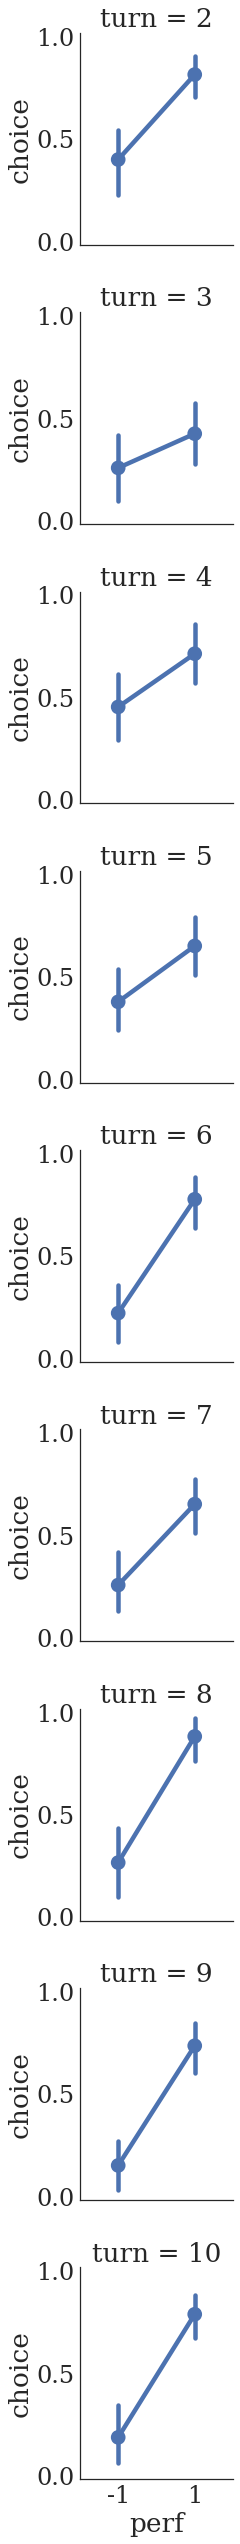

In [1408]:
sns.factorplot('perf', 'choice', row = 'turn', data = indiv_choices[seen])


In [1409]:
indiv_choices[seen].groupby(['perf','turn','item','net']).mean()

choice  seen
perf turn item net                
-1   2    0    4    0.000000  True
               5    0.000000  True
          2    4    0.250000  True
               5    0.500000  True
          3    5    0.000000  True
               6    0.400000  True
          4    5    1.000000  True
          5    4    0.000000  True
               6    0.333333  True
          6    4    0.800000  True
               6    0.500000  True
               7    0.500000  True
     3    0    4    0.500000  True
               6    0.200000  True
          1    5    0.250000  True
               6    0.000000  True
          2    6    0.000000  True
               7    0.666667  True
          3    4    0.333333  True
          4    4    1.000000  True
          5    5    0.000000  True
               6    0.000000  True
          7    4    0.000000  True
               5    1.000000  True
     4    0    6    0.500000  True
          2    4    0.500000  True
               6    0.500000  True
               7    0.000000  True
          3    4    0.500000  True
               5    0.333333  True
...                      ...   ...
 1   9    2    5    0.000000  True
               6    0.666667  True
          3    6    0.500000  True
               7    1.000000  True
          4    4    0.750000  True
               7    0.800000  True
          5    6    0.800000  True
               7    1.000000  True
          6    7    1.000000  True
          7    6    1.000000  True
               7    0.800000  True
     10   0    4    1.000000  True
               5    1.000000  True
               6    0.500000  True
               7    1.000000  True
          1    4    1.000000  True
               6    1.000000  True
               7    0.666667  True
          2    7    1.000000  True
          3    4    0.666667  True
          4    6    0.500000  True
               7    1.000000  True
          5    4    0.500000  True
               5    0.750000  True
               6    0.600000  True
               7    1.000000  True
          6    4    1.000000  True
               6    1.000000  True
               7    0.750000  True
          7    4    0.666667  True

[254 rows x 2 columns]

(0, 1)

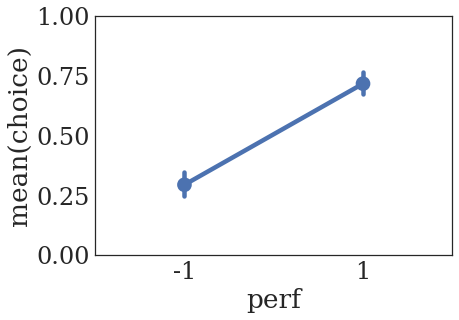

In [1410]:
sns.pointplot('perf', 'choice', data = indiv_choices[seen])
plt.ylim(0,1)

(0, 1)

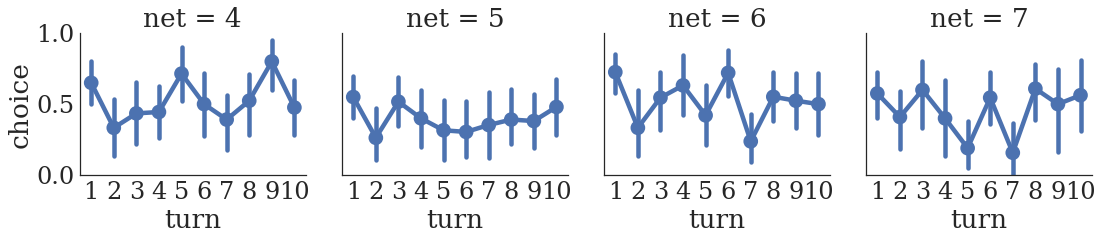

In [1411]:
sns.factorplot('turn', 'choice', col = 'net', data = indiv_choices[~np.array(seen)])
plt.ylim(0,1)

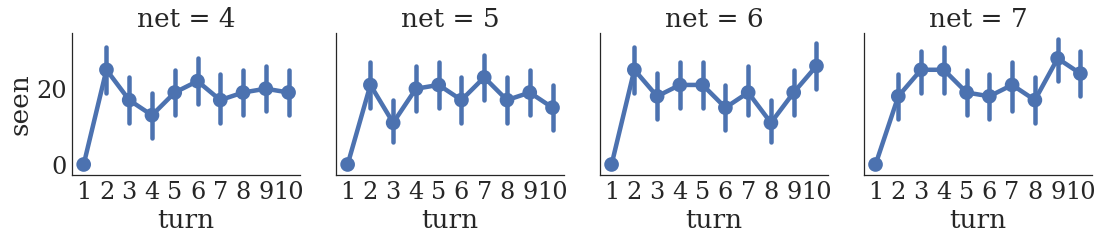

In [1412]:
sns.factorplot('turn', 'seen', col = 'net', data = indiv_choices, estimator = sum)

In [ ]:
num_turns = 10
num_agents = 5
num_actions = 8
actions = []

In [1415]:
fails[0][0]

array([['fail'],
       ['success'],
       ['fail'],
       ['success'],
       ['fail'],
       ['fail'],
       ['fail'],
       ['success']], 
      dtype='<U7')

In [ ]:
for n in nets:
        
    for t in range(num_turns):
    
        for i in range(num_agents):
            
            actions = [n,t,i,[]]
        
            for j in range(num_actions):
                            
                if t == 0:
                    choice = np.random.random() < 0.5
                else:
                    signal = np.mean(fails[n][t][j] == 'fail')
                    
                    
                actions[-1] += [choice]
            